In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.image as mi

In [5]:
df = pd.read_csv("iris_dataset.csv")

In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
plt.figure(figsize=(2,2))

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

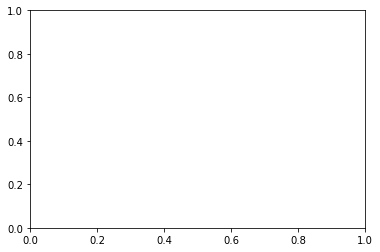

In [11]:
plt.axis('ON')

In [13]:
from sklearn.naive_bayes import GaussianNB

In [18]:
var  = mi.imread("Iris_virginica 3.jpg")

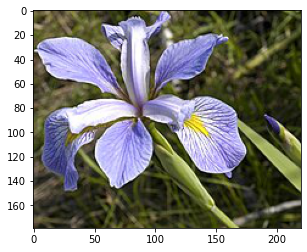

In [19]:
plt.imshow(var)

In [20]:
x = df.iloc[:,:4].values

In [24]:
y = df["target"].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=82)


In [112]:
x_train = sc.fit_transform(x_train)

In [113]:
x_test = sc.transform(x_test)

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
gd = GaussianNB()

In [116]:
nb = gd.fit(x_train,y_train)

In [117]:
y_predict = nb.predict(x_test)

In [118]:
y_predict

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [119]:
y_comparison = np.vstack((y_test,y_predict)).T 

In [120]:
y_comparison[:5]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
mat = confusion_matrix(y_test,y_predict[:45])

In [123]:
mat

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  9]], dtype=int64)

In [124]:
corrected = 0
predicted = 0
p = mat.shape

In [125]:
for row in range(p[0]):
    for c in range(p[1]):
        if row ==c:
            corrected+= mat[row,c]
        else:
            predicted+= mat[row,c]

In [126]:
corrected

28

In [127]:
predicted

2

In [128]:
accuracy = corrected / mat.sum()

In [129]:
accuracy

0.9333333333333333